### ARIMA - Autoregressive Integrated Moving Average
### ARIMA(p,d,q) - ARIMA(1,1,1)

In [175]:
import pandas as pd

# Read the data
df = pd.read_csv('../../Data/cleaned_dataset.csv')

df.head()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,Real Oil Prices
0,12.962951,12.750812,5.803950,19.534471,17.325209,5.952564,6.137924,6.101171,6.327298,5.854031,...,5.861682,3.571677,3.772941,3.498251,6.104337,15.967271,17.533756,9.539485,4.091742,13.715729
1,12.965336,12.751983,5.806582,19.540266,17.320880,5.964607,6.150103,6.113980,6.340179,5.883401,...,5.865968,3.575312,3.782409,3.500802,6.247928,15.942881,17.542367,9.549875,4.019942,13.601725
2,12.970718,12.755952,5.807793,19.549848,17.329560,5.975704,6.160908,6.124948,6.353748,5.910003,...,5.871375,3.580145,3.783457,3.505891,6.270529,15.972082,17.542547,9.562213,4.016897,14.512195
3,12.978406,12.763876,5.815217,19.537241,17.337448,5.980389,6.168790,6.133329,6.363083,5.954359,...,5.873100,3.581351,3.783457,3.509696,6.307429,15.924905,17.543025,9.580477,3.880490,15.017895
4,12.984426,12.770292,5.819106,19.552370,17.341493,5.981250,6.165329,6.128931,6.356100,5.934182,...,5.875166,3.586164,3.794936,3.512227,6.329124,15.943545,17.556218,9.597480,3.882946,15.981442


#### Inspect the data, specifically the target

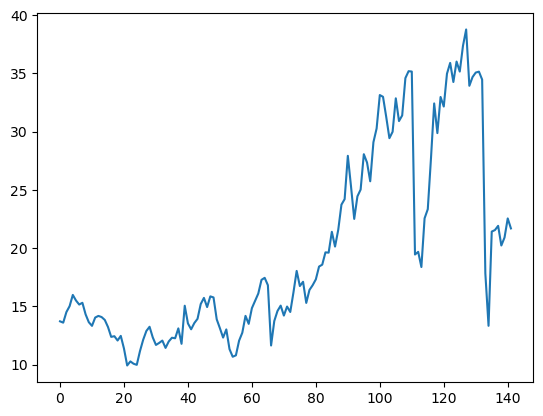

In [176]:
import matplotlib.pyplot as plt

oil_prices = df['Real Oil Prices']
oil_prices.plot()
plt.show()

### Check for Stationarity: Augmented Dickey-Fuller Test

In [177]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

test_stationarity(oil_prices)

ADF Statistic: -1.4102474268945113
p-value: 0.577353632901606
Critial Values:
   1%, -3.479742586699182
Critial Values:
   5%, -2.88319822181578
Critial Values:
   10%, -2.578319684499314


### Explanation of Stationarity:
__Stationarity__ means that a series of data doesn't change its properties over time. This includes its mean, variance, and general trends. Imagine looking at a photo of a river. Whether you're seeing a snapshot from yesterday, a month ago, or a year ago, it should mostly look the same.

For time series modeling, it's essential because many models, like ARIMA, assume that the data is stationary. If it's not, the predictions may be off.

#### ADF Test:
We use the __Augmented Dickey-Fuller (ADF) test__ to check for stationarity. Think of this test as a tool that examines your river photo and tells you if it's pretty much the same river over time or if it's drastically changing.

- __ADF Statistic__: It's a value we get from the test. If it's more negative than the critical values, it suggests the data is stationary.

- __p-value__: This tells us the probability that the data is non-stationary. A p-value below 0.05 typically indicates that the data is stationary.

- __Critical Values__: These are thresholds at different confidence levels (1%, 5%, 10%). If the ADF Statistic is more negative than these values, it supports the data being stationary.

#### First Attempt Results:
- __ADF Statistic__: -1.4102474268945113
- __p-value__: 0.577353632901606
- __Critical Values__:
    - 1%: -3.479742586699182
    - 5%: -2.88319822181578
    - 10%: -2.578319684499314

Based on the results from the first attempt, my p-value of 0.577 is way above the desired threshold of 0.05. This means that the test suggests my data is non-stationary. Also, the ADF Statistic (-1.41) is not more negative than any of the critical values. Hence, it further indicates non-stationarity. Considering my dataset is already log-transformed, I've decided to try differencing.

#### Differencing:
__Differencing__ is a method where we subtract the current value of the series from its previous value. It's like looking at how much the river has changed from one snapshot to the next instead of looking at the entire river's flow. This helps remove trends and makes the series more stationary.

In [178]:
diff_oil_prices = oil_prices.diff().dropna()
test_stationarity(diff_oil_prices)

ADF Statistic: -5.741369645963949
p-value: 6.264329449602621e-07
Critial Values:
   1%, -3.479742586699182
Critial Values:
   5%, -2.88319822181578
Critial Values:
   10%, -2.578319684499314


### Results after Differencing:
- __ADF Statistic__: -5.741369645963949
- __p-value__: 6.264329449602621e-07
- __Critical Values__:
    - 1%: -3.479742586699182
    - 5%: -2.88319822181578
    - 10%: -2.578319684499314


#### Interpretation:
1. ADF Statistic: The value of -5.74 is more negative than all of the critical values. This is a good indication

2. p-value: The p-value is extremely close to zero (6.26e-07). This is way below the threshold of 0.05, which is another strong indication that the differenced data is stationary.

3. Comparison with Critical Values: The ADF statistic should be more negative than the given critical values for the series to be considered stationary. In this case, -5.74 is indeed more negative than all of the listed critical values.

#### Conclusion:
After differencing the data, it now appears to be stationary, as indicated by the ADF test results. This means we can proceed with using the differenced data for time series forecasting models like ARIMA.

## Train ARIMA Model:
For simplicity, let's assume we are working with ARIMA(1,1,1) for now. Determining the best (p,d,q) parameters can be done systematically using tools like auto_arima from the pmdarima library.

In [179]:
# Split data into training and testing sets
# split data chronologically and not randomly - which is why i don't use train_test_split
train_size = int(len(oil_prices) * 0.8) # 80% of data for training
train, test = oil_prices[:train_size], oil_prices[train_size:]

### Grid Search:

In [180]:
import numpy as np
import itertools

# Grid Search for ARIMA parameters
best_aic = np.inf
best_order = None

# Define the p, d, q parameters to take any value between 0 and 5
p = d = q = range(0, 6)

# Generate all different combinations of p, d, and q triplets
pdq = list(itertools.product(p, d, q))

# Iterate through combinations of p, d, q and fit the ARIMA model
for order in pdq:
    try:
        model = ARIMA(train, order=order)
        results = model.fit()
        # Compare this AIC with the best one so far
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
    except:
        continue
print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")

c:\Users\cxwin\Desktop\oil_price_prediction\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\cxwin\Desktop\oil_price_prediction\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


c:\Users\cxwin\Desktop\oil_price_prediction\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\cxwin\Desktop\oil_price_prediction\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\cxwin\Desktop\oil_price_prediction\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\cxwin\Desktop\oil_price_prediction\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible sta

Best ARIMA order: (0, 1, 5) with AIC: 469.9114569535513


c:\Users\cxwin\Desktop\oil_price_prediction\env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [181]:
from statsmodels.tsa.arima.model import ARIMA

# Train the ARIMA model on entire dataset
# model = ARIMA(oil_prices, order=(1,1,1))
# results = model.fit()

# Train the ARIMA model on training data (no grid search)
# model = ARIMA(train, order=(1,1,1))
# results = model.fit()

# Fit ARIMA model with best order (grid search)
model = ARIMA(train, order=best_order)
results = model.fit()

### Forecasting with ARIMA:

In [182]:
forecast = results.forecast(steps=len(test))  # forecast the next n time points (days in this case) - should be equal to the length of test set

### Plot the results:

In [183]:
# import matplotlib.pyplot as plt

# # labels
# plt.xlabel('Days')
# plt.ylabel('Real Oil Prices')
# # title 
# plt.title('Forecasted Oil Prices')
# # plot
# plt.plot(oil_prices, label='Historical')
# plt.plot(np.arange(len(oil_prices), len(oil_prices)+30), forecast, color='red', label='Forecast')
# plt.legend()
# plt.show()

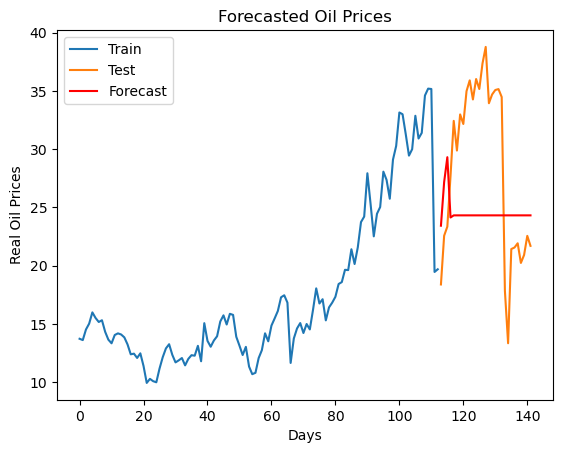

In [184]:
import matplotlib.pyplot as plt

# labels
plt.xlabel('Days')
plt.ylabel('Real Oil Prices')
# title
plt.title('Forecasted Oil Prices')

# Plotting
plt.plot(train, label='Train')
plt.plot(np.arange(len(train), len(oil_prices)), test, label='Test')
plt.plot(np.arange(len(train), len(oil_prices)), forecast, color='red', label='Forecast')
plt.legend()
plt.show()

### Evaluate the model:

In [185]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Evaluation
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

MAE: 7.6134130367906545
MSE: 71.34434979532878
RMSE: 8.446558458646265
MAPE: 26.539065822527686%


### Model Evaluation:

#### First Attempt:
- MAE (Mean Absolute Error):
    - Value: 7.044561069040023
    - Interpretation: On average, the forecast is off by about 7.0446 units.

- MSE (Mean Squared Error):
    - Value: 64.41104514905847
    - Interpretation: It gives more weight to larger errors. This metric can be useful when you want to penalize larger errors more than smaller ones.

- RMSE (Root Mean Squared Error):
    - Value: 8.025649204211362
    - Interpretation: This is the square root of the MSE and provides the error in the same units as the original data. In this case, the forecast is off by an average of about 8.0256 units. RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable.

- MAPE (Mean Absolute Percentage Error):
    - Value: 24.65184248535541%
    - Interpretation: On average, the forecast is off by about 24.65%. This is a relative measure and is often used to compare the forecasting abilities of different methods for a particular series.